In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import string
import re

In [2]:
# Load dataset
#df = pd.read_csv("dataset1.csv", encoding ='unicode_escape')
#df.head(5)
def load_data():
    data = pd.read_csv('inifile.csv')
    return data

tweet_df = load_data()
tweet_df.head()

,waktu,user,tweet
0,2022-04-01 07:36:43,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...
1,2022-04-01 07:36:32,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...
2,2022-04-01 07:36:32,GoRiauCom,"RT @GoRiauCom: Masih PPKM Level 3, Kota Pekanb..."
3,2022-04-01 07:36:07,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...
4,2022-04-01 07:24:13,TheSillinez,@YesTalks Sejak ppkm melonggar 😴


In [3]:
#definisi dataframe
df = pd.DataFrame(tweet_df[['waktu', 'user', 'tweet']])

In [4]:
tweet_df.head()
df['waktu']

0       2022-04-01 07:36:43
1       2022-04-01 07:36:32
2       2022-04-01 07:36:32
3       2022-04-01 07:36:07
4       2022-04-01 07:24:13
               ...         
3500    2022-12-21 06:10:24
3501    2022-12-21 06:10:21
3502    2022-12-21 06:10:09
3503    2022-12-21 06:09:22
3504    2022-12-21 06:08:32
Name: waktu, Length: 3505, dtype: object

In [5]:
def cleaningtweet(tweet):
    #menghapus simbol @
    tweet = re.sub(r'@[A-Za-z0-9]+', '', str(tweet))
    #menghapus simbol #
    tweet = re.sub(r'#[A-Za-z0-9]+', '', str(tweet))
    #mengapus kata RT
    tweet = re.sub(r'RT[\s]+', '', str(tweet))
    #menghapus htpps\
    tweet = re.sub(r"http\S+", '', str(tweet))
    #menghapus nickname
    tweet = re.sub(r'(^|[^@\w])@(\w{1,15})\b', '', str(tweet))
    
    tweet = re.sub(r'[0-9]+', '', str(tweet))
    tweet = re.sub(r"xfxfxxb", '', str(tweet))
    
    tweet = str(tweet).replace('\n', ' ')
    tweet = str(tweet).translate(str.maketrans('', '', string.punctuation))
    tweet = str(tweet).strip(' ')
# Menghapus emoticon
    regrex_pattern = re.compile(pattern='['
                                        u'\U0001F600-\U0001F64F'
                                        u'\U0001F300-\U0001F5FF'
                                        u'\U0001F680-\U0001F6FF'
                                        u'\U0001F1E0-\U0001F1FF'
                                        ']+', flags=re.UNICODE)

    return tweet
df['cleaning'] = df['tweet'].apply(cleaningtweet)
df.head()

,waktu,user,tweet,cleaning
0,2022-04-01 07:36:43,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...
1,2022-04-01 07:36:32,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...
2,2022-04-01 07:36:32,GoRiauCom,"RT @GoRiauCom: Masih PPKM Level 3, Kota Pekanb...",Masih PPKM Level Kota Pekanbaru Sudah Masuk Z...
3,2022-04-01 07:36:07,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...
4,2022-04-01 07:24:13,TheSillinez,@YesTalks Sejak ppkm melonggar 😴,Sejak ppkm melonggar 😴


In [6]:
def casefoldingtweet(tweet):
    tweet = str(tweet).lower()
    return tweet
df['case_folding'] = df['cleaning'].apply(casefoldingtweet)
df.head()

,waktu,user,tweet,cleaning,case_folding
0,2022-04-01 07:36:43,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...
1,2022-04-01 07:36:32,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...
2,2022-04-01 07:36:32,GoRiauCom,"RT @GoRiauCom: Masih PPKM Level 3, Kota Pekanb...",Masih PPKM Level Kota Pekanbaru Sudah Masuk Z...,masih ppkm level kota pekanbaru sudah masuk z...
3,2022-04-01 07:36:07,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...
4,2022-04-01 07:24:13,TheSillinez,@YesTalks Sejak ppkm melonggar 😴,Sejak ppkm melonggar 😴,sejak ppkm melonggar 😴


In [7]:
nltk.download('punkt')
def tokenizingtweet(tweet):
    tweet = word_tokenize(tweet)
    return tweet
df['tokenizing'] = df['case_folding'].apply(tokenizingtweet)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\taukhid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,waktu,user,tweet,cleaning,case_folding,tokenizing
0,2022-04-01 07:36:43,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...,"[karanganyar, jumat, april, serda, eko, santos..."
1,2022-04-01 07:36:32,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...,"[karanganyar, jumat, april, serda, eko, santos..."
2,2022-04-01 07:36:32,GoRiauCom,"RT @GoRiauCom: Masih PPKM Level 3, Kota Pekanb...",Masih PPKM Level Kota Pekanbaru Sudah Masuk Z...,masih ppkm level kota pekanbaru sudah masuk z...,"[masih, ppkm, level, kota, pekanbaru, sudah, m..."
3,2022-04-01 07:36:07,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...,"[karanganyar, jumat, april, serda, eko, santos..."
4,2022-04-01 07:24:13,TheSillinez,@YesTalks Sejak ppkm melonggar 😴,Sejak ppkm melonggar 😴,sejak ppkm melonggar 😴,"[sejak, ppkm, melonggar, 😴]"


In [8]:
#belum di masukan di laporan
normalizad_word = pd.read_excel("normalisasi/normalisasi.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalizedtweet(tweet):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in tweet]
df['normalizing'] = df['tokenizing'].apply(normalizedtweet)
df.head()

,waktu,user,tweet,cleaning,case_folding,tokenizing,normalizing
0,2022-04-01 07:36:43,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...,"[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos..."
1,2022-04-01 07:36:32,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...,"[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos..."
2,2022-04-01 07:36:32,GoRiauCom,"RT @GoRiauCom: Masih PPKM Level 3, Kota Pekanb...",Masih PPKM Level Kota Pekanbaru Sudah Masuk Z...,masih ppkm level kota pekanbaru sudah masuk z...,"[masih, ppkm, level, kota, pekanbaru, sudah, m...","[masih, ppkm, level, kota, pekanbaru, sudah, m..."
3,2022-04-01 07:36:07,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...,"[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos..."
4,2022-04-01 07:24:13,TheSillinez,@YesTalks Sejak ppkm melonggar 😴,Sejak ppkm melonggar 😴,sejak ppkm melonggar 😴,"[sejak, ppkm, melonggar, 😴]","[sejak, ppkm, melonggar, 😴]"


In [9]:
def stemmingtweet(tweet):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    tweet = [stemmer.stem(word) for word in tweet]
    return tweet
df['stemming'] = df['normalizing'].apply(stemmingtweet)
df.head()

,waktu,user,tweet,cleaning,case_folding,tokenizing,normalizing,stemming
0,2022-04-01 07:36:43,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...,"[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos..."
1,2022-04-01 07:36:32,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...,"[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos..."
2,2022-04-01 07:36:32,GoRiauCom,"RT @GoRiauCom: Masih PPKM Level 3, Kota Pekanb...",Masih PPKM Level Kota Pekanbaru Sudah Masuk Z...,masih ppkm level kota pekanbaru sudah masuk z...,"[masih, ppkm, level, kota, pekanbaru, sudah, m...","[masih, ppkm, level, kota, pekanbaru, sudah, m...","[masih, ppkm, level, kota, pekanbaru, sudah, m..."
3,2022-04-01 07:36:07,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...,"[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos..."
4,2022-04-01 07:24:13,TheSillinez,@YesTalks Sejak ppkm melonggar 😴,Sejak ppkm melonggar 😴,sejak ppkm melonggar 😴,"[sejak, ppkm, melonggar, 😴]","[sejak, ppkm, melonggar, 😴]","[sejak, ppkm, longgar, ]"


In [10]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopwords = [
    'yg', 'utk', 'cuman', 'deh', 'btw', 'tapi', 'gua', 'gue', 'lo', 'lu', 'ohh', 'ooh', 
    'kalo', 'trs', 'jd', 'nih', 'ntar', 'nya', 'lg', 'gk', 'ecusli', 'dpt', 'kmr', 'haloo', 
    'dr', 'kpn', 'kok', 'kyk', 'donk', 'yah', 'u', 'ya', 'ga', 'km', 'eh', 'gooooo', 'ooo', 
    'sih', 'bro', 'bang', 'br', 'kek', 'rp', 'jt', 'kan', 'gpp', 'sm', 'usah', 'pun', 'punn', 
    'mas', 'sob', 'thx', 'ato', 'jg', 'gw', 'wkwk', 'mak', 'haha', 'iy', 'k', 'ynggg', 'heem', 
    'tp', 'haha', 'dg', 'dri', 'duh', 'ye', 'wkwkwk', 'syg', 'btw', 'gaes', 'wih', 'ono', 'noh', 
    'guys', 'moga', 'kmrn', 'nemu', 'yukkk', 'wkwkw', 'klas', 'ew', 'lho', 'sbnry', 'ops', 'ah', 
    'org', 'gtu', 'bwt', 'klrga', 'clau', 'lbh', 'cpet', 'ku', 'wke', 'mba', 'sdh', 'koq', 'kak', 
    'oi', 'spt', 'dlm', 'bs', 'krn', 'jgn', 'sapa', 'sh', 'wakakaka', 'sihhh', 'hehe', 'mr', 
    'ih', 'dgn', 'la', 'kl', 'ttg', 'mana', 'kmna', 'kmn', 'tdk', 'tuh', 'dah', 'kek', 
    'ko', 'pls', 'bbrp', 'pd', 'mah', 'dhhh', 'kpd', 'tsb', 'kzl', 'byar', 'si', 'sii', 
    'cm', 'sy', 'hahahaha', 'weh', 'dlu', 'tuhh', 'dng', 'lohh', 'lha', 'cuy', 'broo'
]
data = stop_factory + more_stopwords

dictionary = ArrayDictionary(data)
str = StopWordRemover(dictionary)

# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

#print(data)
def filtering(tweet):
    #tokenize tweets
    #tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    #tweet_tokens = tokenizer.tokenize(tweet)
    
    removed = []
    for word in tweet:
        if (word not in data and
           word not in emoticons):
            removed.append(word)
    return removed
df['filtering'] = df['stemming'].apply(filtering)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taukhid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,waktu,user,tweet,cleaning,case_folding,tokenizing,normalizing,stemming,filtering
0,2022-04-01 07:36:43,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...,"[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos..."
1,2022-04-01 07:36:32,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...,"[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos..."
2,2022-04-01 07:36:32,GoRiauCom,"RT @GoRiauCom: Masih PPKM Level 3, Kota Pekanb...",Masih PPKM Level Kota Pekanbaru Sudah Masuk Z...,masih ppkm level kota pekanbaru sudah masuk z...,"[masih, ppkm, level, kota, pekanbaru, sudah, m...","[masih, ppkm, level, kota, pekanbaru, sudah, m...","[masih, ppkm, level, kota, pekanbaru, sudah, m...","[ppkm, level, kota, pekanbaru, zona, kuning, t..."
3,2022-04-01 07:36:07,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...,"[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos..."
4,2022-04-01 07:24:13,TheSillinez,@YesTalks Sejak ppkm melonggar 😴,Sejak ppkm melonggar 😴,sejak ppkm melonggar 😴,"[sejak, ppkm, melonggar, 😴]","[sejak, ppkm, melonggar, 😴]","[sejak, ppkm, longgar, ]","[ppkm, longgar, ]"


In [11]:
def toSentence(tweet):
    sentence = ' '.join(word for word in tweet)
    return sentence
df['tweets'] = df['filtering'].apply(toSentence)
print("Data size : ", df.shape)

Data size :  (3505, 10)


In [12]:
# hapus duplicate
df.drop_duplicates(subset = 'tweets', inplace = True)
df = df.reset_index(drop=True)
df = df[df['tweets']!='']
print("Data size : ", df.shape)
df.head()

Data size :  (1594, 10)


,waktu,user,tweet,cleaning,case_folding,tokenizing,normalizing,stemming,filtering,tweets
0,2022-04-01 07:36:43,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...,"[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos...",karanganyar jumat april serda eko santoso angg...
1,2022-04-01 07:36:32,GoRiauCom,"RT @GoRiauCom: Masih PPKM Level 3, Kota Pekanb...",Masih PPKM Level Kota Pekanbaru Sudah Masuk Z...,masih ppkm level kota pekanbaru sudah masuk z...,"[masih, ppkm, level, kota, pekanbaru, sudah, m...","[masih, ppkm, level, kota, pekanbaru, sudah, m...","[masih, ppkm, level, kota, pekanbaru, sudah, m...","[ppkm, level, kota, pekanbaru, zona, kuning, t...",ppkm level kota pekanbaru zona kuning tular covid
2,2022-04-01 07:24:13,TheSillinez,@YesTalks Sejak ppkm melonggar 😴,Sejak ppkm melonggar 😴,sejak ppkm melonggar 😴,"[sejak, ppkm, melonggar, 😴]","[sejak, ppkm, melonggar, 😴]","[sejak, ppkm, longgar, ]","[ppkm, longgar, ]",ppkm longgar
3,2022-04-01 07:21:48,KopiManjah,PPKM jg perpanjang trus ga udah2 itu aspirasi ...,PPKM jg perpanjang trus ga udah itu aspirasi sapa,ppkm jg perpanjang trus ga udah itu aspirasi sapa,"[ppkm, jg, perpanjang, trus, ga, udah, itu, as...","[ppkm, juga, perpanjang, terus, tidak, sudah, ...","[ppkm, juga, panjang, terus, tidak, sudah, itu...","[ppkm, aspirasi]",ppkm aspirasi
4,2022-04-01 07:19:50,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Didik...,KARANGANYAR Jumat April Serda Didik anggota...,karanganyar jumat april serda didik anggota...,"[karanganyar, jumat, april, serda, didik, angg...","[karanganyar, jumat, april, serda, didik, angg...","[karanganyar, jumat, april, serda, didik, angg...","[karanganyar, jumat, april, serda, didik, angg...",karanganyar jumat april serda didik anggota ko...


In [13]:
df.to_csv('hasilPreprocessing.csv',encoding='utf8', index=True)
df

,waktu,user,tweet,cleaning,case_folding,tokenizing,normalizing,stemming,filtering,tweets
0,2022-04-01 07:36:43,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Eko S...,KARANGANYAR Jumat April Serda Eko Santoso a...,karanganyar jumat april serda eko santoso a...,"[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos...","[karanganyar, jumat, april, serda, eko, santos...",karanganyar jumat april serda eko santoso angg...
1,2022-04-01 07:36:32,GoRiauCom,"RT @GoRiauCom: Masih PPKM Level 3, Kota Pekanb...",Masih PPKM Level Kota Pekanbaru Sudah Masuk Z...,masih ppkm level kota pekanbaru sudah masuk z...,"[masih, ppkm, level, kota, pekanbaru, sudah, m...","[masih, ppkm, level, kota, pekanbaru, sudah, m...","[masih, ppkm, level, kota, pekanbaru, sudah, m...","[ppkm, level, kota, pekanbaru, zona, kuning, t...",ppkm level kota pekanbaru zona kuning tular covid
2,2022-04-01 07:24:13,TheSillinez,@YesTalks Sejak ppkm melonggar 😴,Sejak ppkm melonggar 😴,sejak ppkm melonggar 😴,"[sejak, ppkm, melonggar, 😴]","[sejak, ppkm, melonggar, 😴]","[sejak, ppkm, longgar, ]","[ppkm, longgar, ]",ppkm longgar
3,2022-04-01 07:21:48,KopiManjah,PPKM jg perpanjang trus ga udah2 itu aspirasi ...,PPKM jg perpanjang trus ga udah itu aspirasi sapa,ppkm jg perpanjang trus ga udah itu aspirasi sapa,"[ppkm, jg, perpanjang, trus, ga, udah, itu, as...","[ppkm, juga, perpanjang, terus, tidak, sudah, ...","[ppkm, juga, panjang, terus, tidak, sudah, itu...","[ppkm, aspirasi]",ppkm aspirasi
4,2022-04-01 07:19:50,KodimKarangany1,KARANGANYAR - Jum'at 01 April 2022 Serda Didik...,KARANGANYAR Jumat April Serda Didik anggota...,karanganyar jumat april serda didik anggota...,"[karanganyar, jumat, april, serda, didik, angg...","[karanganyar, jumat, april, serda, didik, angg...","[karanganyar, jumat, april, serda, didik, angg...","[karanganyar, jumat, april, serda, didik, angg...",karanganyar jumat april serda didik anggota ko...
...,...,...,...,...,...,...,...,...,...,...
1589,2022-12-21 06:15:26,IniBalikpapaner,Presiden Jokowi Segera Terbitkan Keppres Pengh...,Presiden Jokowi Segera Terbitkan Keppres Pengh...,presiden jokowi segera terbitkan keppres pengh...,"[presiden, jokowi, segera, terbitkan, keppres,...","[presiden, jokowi, segera, terbitkan, keppres,...","[presiden, jokowi, segera, terbit, keppres, ha...","[presiden, jokowi, terbit, keppres, hapus, ppk...",presiden jokowi terbit keppres hapus ppkm tahun
1590,2022-12-21 06:11:33,antaramakassar,Presiden Jokowi : Menteri akan selesaikan kaji...,Presiden Jokowi Menteri akan selesaikan kajia...,presiden jokowi menteri akan selesaikan kajia...,"[presiden, jokowi, menteri, akan, selesaikan, ...","[presiden, jokowi, menteri, akan, selesaikan, ...","[presiden, jokowi, menteri, akan, selesai, kaj...","[presiden, jokowi, menteri, selesai, kaji, hen...",presiden jokowi menteri selesai kaji henti ppk...
1591,2022-12-21 06:11:22,Antara_Kalteng,"Akhir 2022, pemerintah nyatakan PPKM berhenti ...",Akhir pemerintah nyatakan PPKM berhenti,akhir pemerintah nyatakan ppkm berhenti,"[akhir, pemerintah, nyatakan, ppkm, berhenti]","[akhir, pemerintah, nyatakan, ppkm, berhenti]","[akhir, perintah, nyata, ppkm, henti]","[perintah, ppkm, henti]",perintah ppkm henti
1592,2022-12-21 06:11:18,cakra9901,KARANGANYAR - Serka Hermansyah beserta 2 anggo...,KARANGANYAR Serka Hermansyah beserta anggota...,karanganyar serka hermansyah beserta anggota...,"[karanganyar, serka, hermansyah, beserta, angg...","[karanganyar, serka, hermansyah, beserta, angg...","[karanganyar, serka, hermansyah, serta, anggot...","[karanganyar, serka, hermansyah, anggota, kora...",karanganyar serka hermansyah anggota koramil t...


In [14]:
# hapus kolom
df.drop(df.columns[[1,2,3,4,5,6,7]], axis = 1, inplace = True)
df.head()

,waktu,filtering,tweets
0,2022-04-01 07:36:43,"[karanganyar, jumat, april, serda, eko, santos...",karanganyar jumat april serda eko santoso angg...
1,2022-04-01 07:36:32,"[ppkm, level, kota, pekanbaru, zona, kuning, t...",ppkm level kota pekanbaru zona kuning tular covid
2,2022-04-01 07:24:13,"[ppkm, longgar, ]",ppkm longgar
3,2022-04-01 07:21:48,"[ppkm, aspirasi]",ppkm aspirasi
4,2022-04-01 07:19:50,"[karanganyar, jumat, april, serda, didik, angg...",karanganyar jumat april serda didik anggota ko...


In [15]:
# simpan data bersih
df.to_csv('mentah.csv',encoding='utf8', index=False)

In [16]:
lexicon_positive = dict()
import csv
with open('lexicon/lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon/lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(tweet):
    #for word in tweet:
    score = 0
    for word in tweet:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in tweet:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score >= 0):
        polarity = '1'
    else:
        polarity = '0'
    return score, polarity

0    897
1    697
Name: polarity, dtype: int64


<AxesSubplot:>

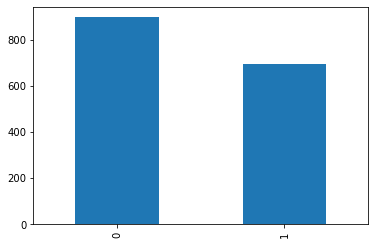

In [17]:
#Results from determine sentiment polarity of tweets
results = df['filtering'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())
df['polarity'].value_counts().plot(kind='bar')

In [18]:
# simpan data bersih
df.to_csv('testdatabersihhhh.csv',encoding='utf8', index=False)